In [49]:
#Loading Libraries
install.packages("hablar")
install.packages("ggpubr")


Installing package into 'C:/Users/Munnu Joseph/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'hablar' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Munnu Joseph\AppData\Local\Temp\Rtmpy0riDh\downloaded_packages



Attaching package: 'hablar'

The following object is masked from 'package:dplyr':

    na_if



In [1]:
#Loading Libraries
library(tidyverse)
library(magrittr) # better handling of pipes
library(purrr) # to work with lists and map functions
library(glue) # to paste strings
library(stringr) # to hand strings
library(rvest) # rvest makes scraping easier
library(polite) # polite is the "polite" version of rvest
library(hablar)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.2.1     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract



Attaching package: ‘glue’


The following object is masked from ‘package:dplyr’:

    collapse


Loading required package: xml2


Attaching package: ‘rvest’


The following object is masked from ‘package:purrr’:

    pluck


The following object is masked from ‘package:readr’:

    guess_encoding



Attaching package: ‘hablar’


The following object is masked from ‘package:dplyr’:

    na_if




In [4]:
#library(rJava)
library(readxl)
#library(xlsx)
library(unpivotr)
library(tidyverse)
library(tidyxl)


Attaching package: ‘unpivotr’


The following objects are masked from ‘package:tidyr’:

    pack, unpack




In [6]:
"overseas-merchandise-trade-january-2019.xlsx" %>%  read_excel() %>%
 glimpse()

New names:
* `` -> ...2


Observations: 37
Variables: 2
$ `Overseas merchandise trade: January 2019` <chr> NA, "List of tables", "1...
$ ...2                                       <chr> NA, NA, "Overseas mercha...


In [5]:
new_data <- xlsx_cells("overseas-merchandise-trade-january-2019.xlsx") %>% filter(sheet == "Table 2")%>%  rectify()%>% head(56) %>% tail(40)

In [6]:
new_data_2 <- as_tibble(new_data)

In [7]:
names(new_data_2) <- c("Row_Number","Year","Month","head1","Exports","head2","Export_change_Value","Imports",
                       "head3","Import_Change_Value","head4","head5","head6","head7","head8","head9","head10",
                       "head11","head12","head13")
head(new_data_2)

Row_Number,Year,Month,head1,Exports,head2,Export_change_Value,Imports,head3,Import_Change_Value,head4,head5,head6,head7,head8,head9,head10,head11,head12,head13
<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,<lgl>,<chr>,<lgl>,<chr>,<chr>,<lgl>,<chr>,<chr>,<lgl>
17,2016,Jan,NA,4370,NA,11.1,4343,NA,2.7,28,NA,4102,NA,0.2,4238,NA,-1.2,-136,NA
18,NA,Feb,NA,4179,NA,-4.4,4173,NA,-3.9,6,NA,4103,NA,0,4204,NA,-0.8,-101,NA
19,NA,Mar,NA,3624,NA,-13.3,4011,NA,-3.9,-387,NA,4096,NA,-0.2,4187,NA,-0.4,-91,NA
20,NA,Apr,NA,4097,NA,13,4285,NA,6.8,-188,NA,4082,NA,-0.3,4184,NA,-0.1,-102,NA
21,NA,May,NA,4185,NA,2.2,4242,NA,-1,-56,NA,4063,NA,-0.5,4197,NA,0.3,-134,NA
22,NA,Jun,NA,4089,NA,-2.3,4216,NA,-0.6,-128,NA,4042,NA,-0.5,4218,NA,0.5,-176,NA


In [8]:

data1 <- new_data_2 %>%
select(Row_Number,Year,Month,Exports,Export_change_Value,Imports,Import_Change_Value) %>%
filter(Row_Number <29) %>%
mutate(Year=2016)

data2 <- new_data_2 %>%
select(Row_Number,Year,Month,Exports,Export_change_Value,Imports,Import_Change_Value) %>%
filter(Row_Number>29 & Row_Number<42) %>%
mutate(Year=2017)

data3 <- new_data_2 %>%
select(Row_Number,Year,Month,Exports,Export_change_Value,Imports,Import_Change_Value) %>%
filter(Row_Number>42 & Row_Number<55) %>%
mutate(Year=2018)

data4 <- new_data_2 %>%
select(Row_Number,Year,Month,Exports,Export_change_Value,Imports,Import_Change_Value) %>%
filter(Row_Number==56) %>%
mutate(Year=2019)

Export_Import_Data <- rbind(data1,data2,data3,data4) %>%
select(Year,Month,Exports,Export_change_Value,Imports,Import_Change_Value)

In [12]:
Export_Import_Data_tidy <- transform(Export_Import_Data, 
         Year = round(as.numeric(Year),0) ,                         
         Exports = round(as.numeric(Exports),2),
         Export_change_Value = round(as.numeric(Export_change_Value),2),
         Imports = round(as.numeric(Imports),2),
         Import_Change_Value = round(as.numeric(Import_Change_Value),2))

Export_Import_Data_2018 <-Export_Import_Data_tidy %>%
filter(Year==2018)

Export_Import_Data_2017 <-Export_Import_Data_tidy %>%
filter(Year==2017)

In [13]:

url <- "https://www.climatestotravel.com/climate/new-zealand"  # this is the base url from where the scraping starts
seasonality <- read_html(url) %>%
              html_table(fill=TRUE) # Reading and parsing the html of given webpage

Month_Value <- c("Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec")

seasonality_details <- data.frame(seasonality[1]) %>%
                      t() %>% 
                      data.frame() %>%
                      slice(-1) %>%
                      mutate(Month=Month_Value)

names(seasonality_details) <- c("Min(°C)","Max(°C)","Min(°F)","Max(°F)","Month")

seasonality_details_tidy <- seasonality_details %>% 
                            select(Month,"Min(°C)","Max(°C)","Min(°F)","Max(°F)") %>%
                            retype() # To convert factor value to numeric,the problem is commas instead of dots,
                                     #it replaces them with dots -from Stackoverflow.com
                           

seasonality_details_tidy


Month,Min(°C),Max(°C),Min(°F),Max(°F)
<chr>,<int>,<int>,<int>,<int>
Jan,16,24,61,75
Feb,17,24,63,75
Mar,15,23,59,73
Apr,13,20,55,68
May,11,17,52,63
Jun,8,15,46,59
Jul,8,14,46,57
Aug,8,15,46,59
Sep,10,16,50,61


In [14]:
Export_Import_Monthly <-merge(x = Export_Import_Data_2018, y = seasonality_details_tidy, by = "Month",sort = F)
Export_Import_Monthly

Export_Import_2017 <-merge(x = Export_Import_Data_2017, y = seasonality_details_tidy, by = "Month",sort = F)
Export_Import_2017

Month,Year,Exports,Export_change_Value,Imports,Import_Change_Value,Min(°C),Max(°C),Min(°F),Max(°F)
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
Jan,2018,4540,-12.8,5129,1.9,16,24,61,75
Feb,2018,4586,1.0,4793,-6.6,17,24,63,75
Mar,2018,4467,-2.6,5167,7.8,15,23,59,73
Apr,2018,4714,5.5,5180,0.3,13,20,55,68
May,2018,4668,-1.0,4936,-4.7,11,17,52,63
Jun,2018,4772,2.2,5430,10.0,8,15,46,59
Jul,2018,5068,6.2,5447,0.3,8,14,46,57
Aug,2018,4767,-5.9,5268,-3.3,8,15,46,59
Sep,2018,5133,7.7,5764,9.4,10,16,50,61


Month,Year,Exports,Export_change_Value,Imports,Import_Change_Value,Min(°C),Max(°C),Min(°F),Max(°F)
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
Jan,2017,4275,6.1,4474,3.7,16,24,61,75
Feb,2017,4122,-3.6,4560,1.9,17,24,63,75
Mar,2017,4134,0.3,4432,-2.8,15,23,59,73
Apr,2017,4600,11.3,4629,4.5,13,20,55,68
May,2017,4348,-5.5,4717,1.9,11,17,52,63
Jun,2017,4460,2.6,4522,-4.1,8,15,46,59
Jul,2017,4644,4.1,4617,2.1,8,14,46,57
Aug,2017,4328,-6.8,4523,-2.0,8,15,46,59
Sep,2017,4374,1.1,4713,4.2,10,16,50,61


In [15]:
Months.name <- c("Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec")


In [16]:
# Reference-https://www.datacamp.com/community/tutorials/facets-ggplot-r

scales_y <- list(
  "Exports" = scale_y_continuous(limits = c(0, 6000), breaks = seq(0, 2000, 6000)),
  "Imports" = scale_y_continuous(limits = c(0, 6000), breaks = seq(0, 2000, 6000)),
  "Max(°C)" = scale_y_continuous(limits = c(5, 30), breaks = seq(5, 10, 30))
)

variable_names <- list(
  "Exports" = "Exports in 2018" ,
  "Imports" = "Imports in 2018",
   "Max(°C)" = "Average Temperature of New Zealand"
)

variable_names_2017 <- list(
  "Exports" = "Exports in 2017" ,
  "Imports" = "Imports in 2017",
   "Max(°C)" = "Average Temperature of New Zealand"
)

variable_labeller <- function(variable,value){
  return(variable_names[value])
                    }

variable_labeller_2017 <- function(variable,value){
  return(variable_names_2017[value])
                    }

In [17]:
Export_Import_Temp_Monthly <- gather(Export_Import_Monthly, key="measure", value="value", c("Exports", "Imports","Max(°C)"))
Export_Import_Temp_2017 <- gather(Export_Import_2017, key="measure", value="value", c("Exports", "Imports","Max(°C)"))

In [56]:
 Import_Export_2018_graph <- ggplot(data=Export_Import_Temp_Monthly, mapping=aes(x=ordered(Month,levels=Months.name), y=value,group=1))+
 #geom_bar(stat='identity', fill="forest green")
  geom_point(color="blue")+
 geom_line()+ 
 facet_wrap(~measure,ncol=1,labeller=variable_labeller,scales ="free") +
 labs(Title="Analyis of Export and Import based on Climate Conditions",x="Month")+
 theme_bw() 

 Import_Export_2017_graph  <- ggplot(data=Export_Import_Temp_2017, mapping=aes(x=ordered(Month,levels=Months.name), y=value,group=1))+
 #geom_bar(stat='identity', fill="forest green")
 geom_point(color="blue")+
 geom_line()+ 
 facet_wrap(~measure,ncol=1,labeller=variable_labeller_2017,scales ="free") +
 labs(Title="Analyis of Export and Import based on Climate Conditions",x="Month")+
 theme_bw()


Warning message:
"The labeller API has been updated. Labellers taking `variable`and `value` arguments are now deprecated. See labellers documentation."Warning message:
"The labeller API has been updated. Labellers taking `variable`and `value` arguments are now deprecated. See labellers documentation."

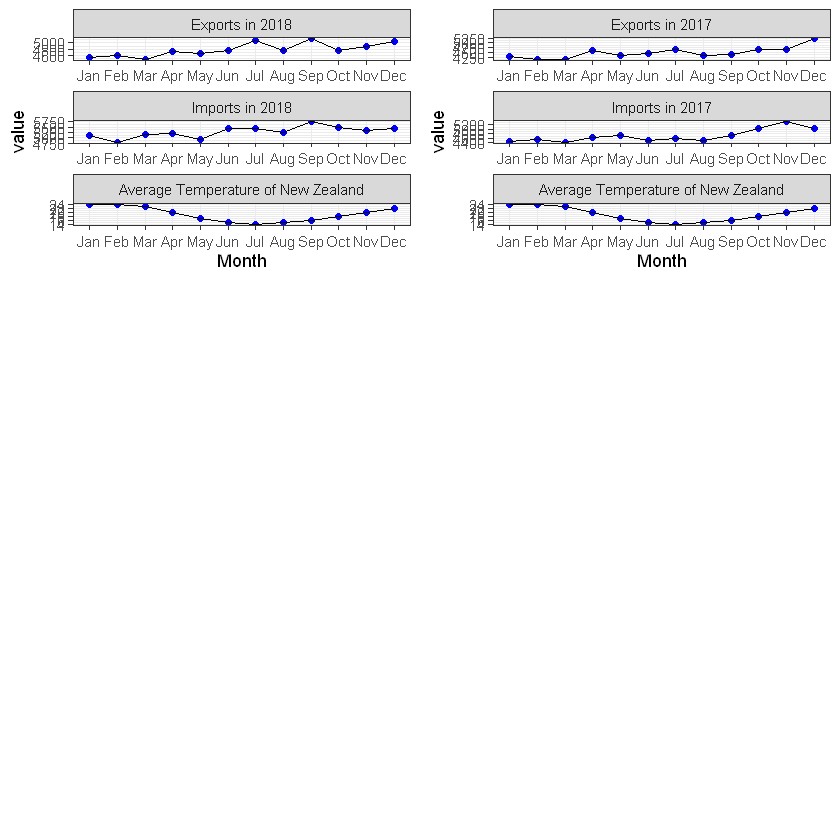

In [60]:
library(ggpubr)
ggarrange(Import_Export_2018_graph, Import_Export_2017_graph, 
          ncol = 2, nrow = 3)

## BAR CHART

In [37]:
Export_Import_Monthly_Details <- gather(Export_Import_Monthly, key="measure", value="value", c("Exports", "Imports"))

Warning message:
"Ignoring unknown parameters: labeller, scales"

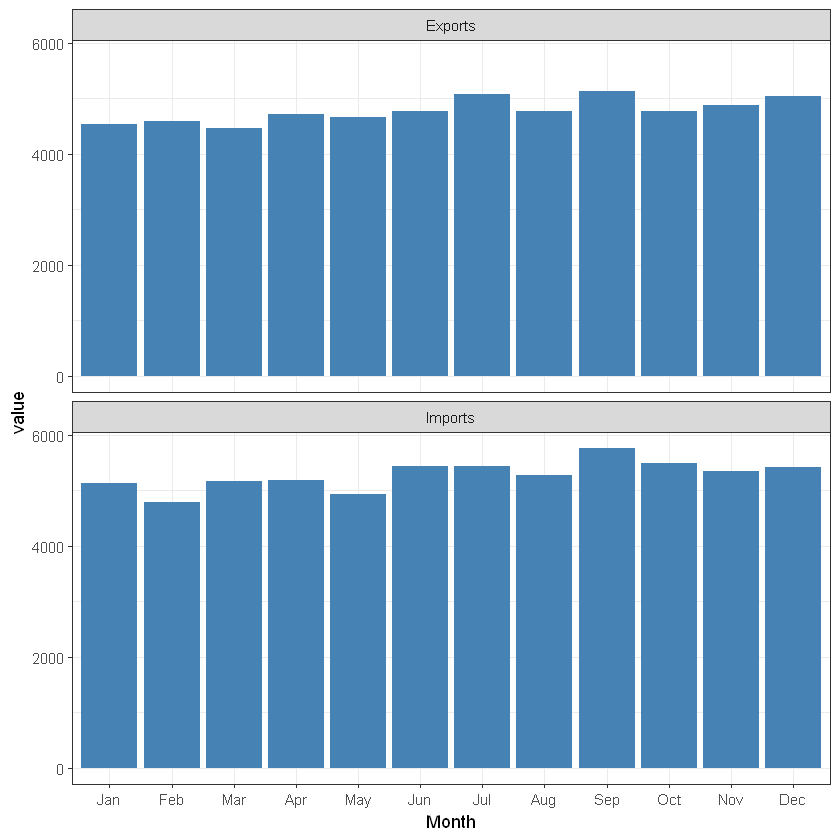

In [46]:
ggplot(data=Export_Import_Monthly_Details, mapping=aes(x=ordered(Month,levels=Months.name), y=value,group=1))+
 geom_bar(stat='identity', fill="steelblue",scales="free") +
 facet_wrap(~measure,ncol=1) +
 labs(Title="Analayis of Export and Import based on Climate Conditions",x="Month")+
 theme_bw()

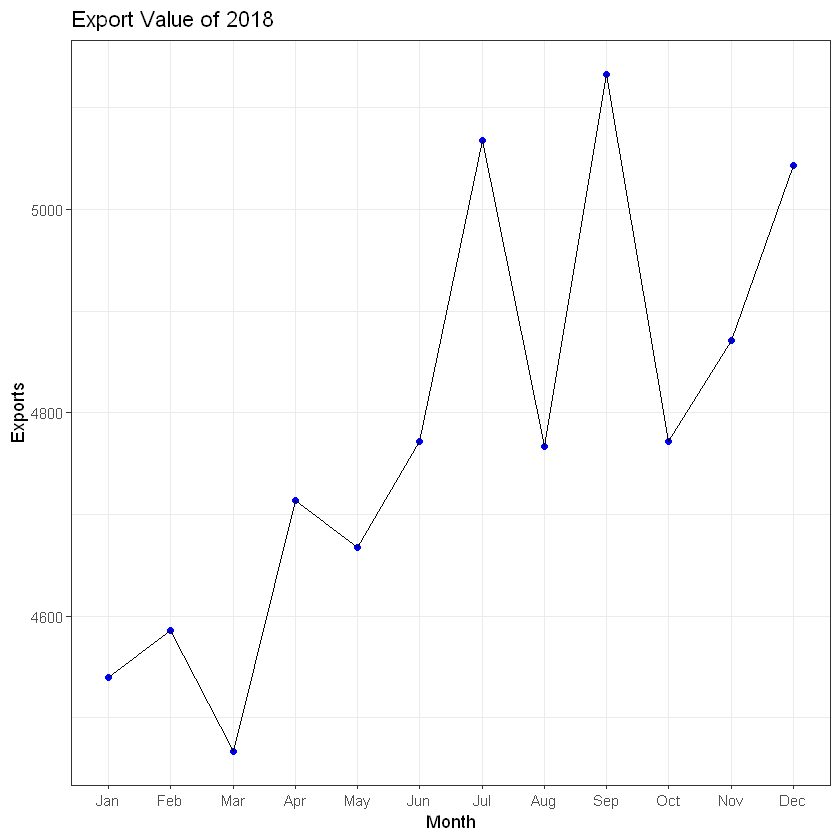

In [69]:
 Export_2018_graph <- ggplot(data=Export_Import_Data_2018, mapping=aes(x=ordered(Month,levels=Months.name), y=Exports,group=1))+
 #geom_bar(stat='identity', fill="forest green")
  geom_point(color="blue")+
  geom_line()+
 ggtitle("Export Value of 2018") + xlab("Month")+
 theme_bw()
 Export_2018_graph

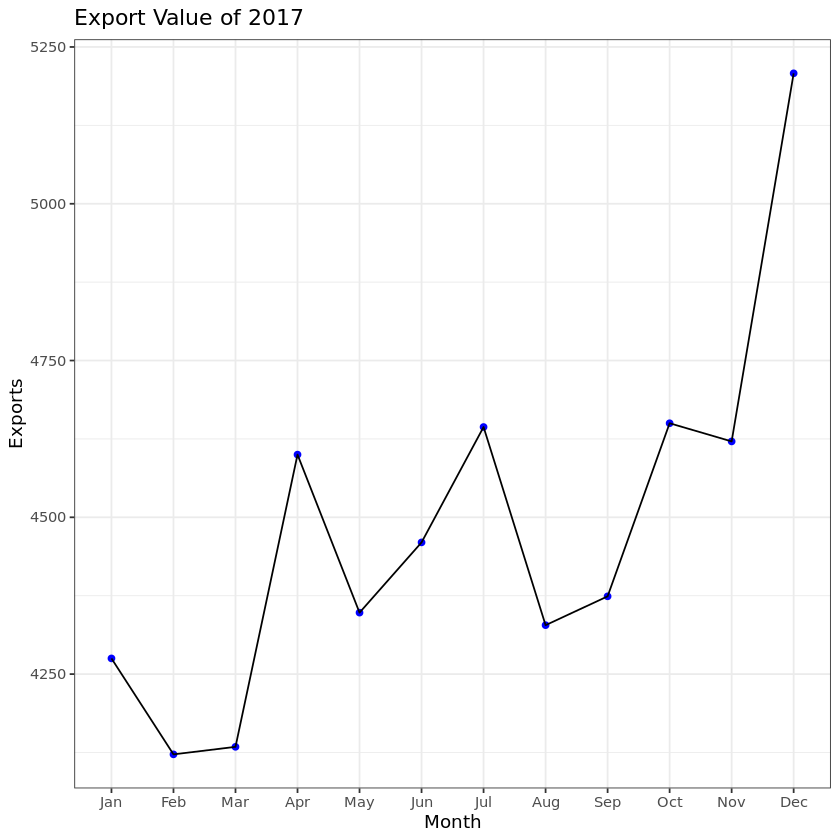

In [19]:
 ggplot(data=Export_Import_Data_2017, mapping=aes(x=ordered(Month,levels=Months.name), y=Exports,group=1))+
 #geom_bar(stat='identity', fill="forest green")
  geom_point(color="blue")+
  geom_line()+
  ggtitle("Export Value of 2017") + xlab("Month")+
  theme_bw()
  

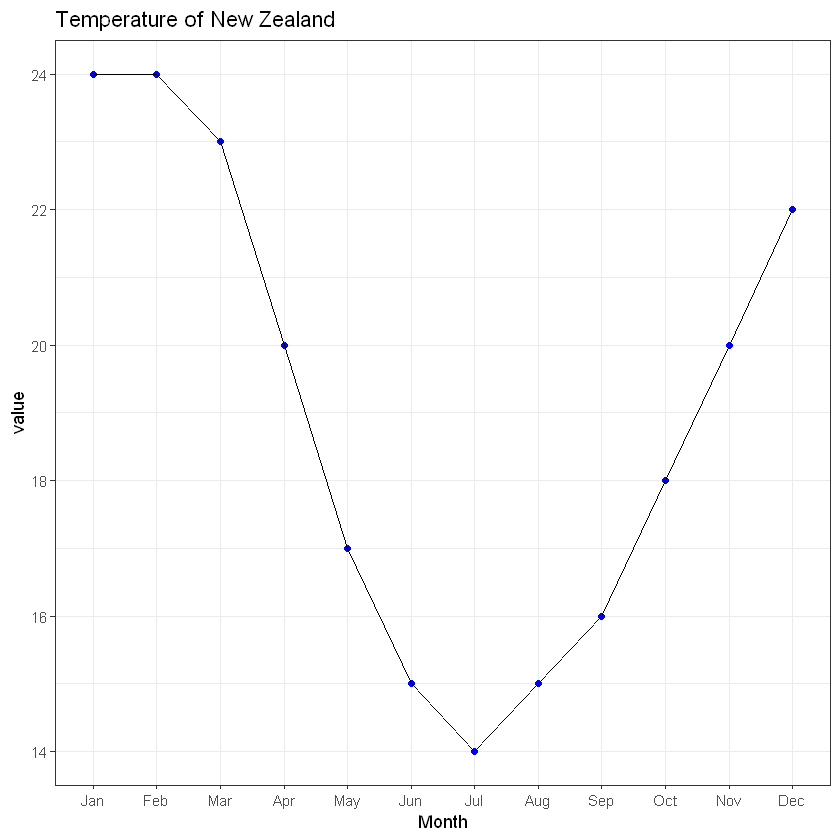

In [76]:
Export_Import_Temp_Monthly <- gather(Export_Import_Monthly, key="measure", value="value", c("Max(°C)")) 
Temperature <- ggplot(data=Export_Import_Temp_Monthly, mapping=aes(x=ordered(Month,levels=Months.name), y=value,group=1))+
 #geom_bar(stat='identity', fill="forest green")
  geom_point(color="blue")+
  geom_line()+
  ggtitle("Temperature of New Zealand") + xlab("Month")+
  theme_bw()
  Temperature

In [25]:
dim(Export_Import_Data_2018)

[1] 12  6

In [24]:
dim(Export_Import_Data_2017)

[1] 12  6

In [27]:
impexp<-bind_rows(Export_Import_Data_2018,Export_Import_Data_2017)
impexp%>%head(2)

Year,Month,Exports,Export_change_Value,Imports,Import_Change_Value
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
2018,Jan,4540,-12.8,5129,1.9
2018,Feb,4586,1.0,4793,-6.6


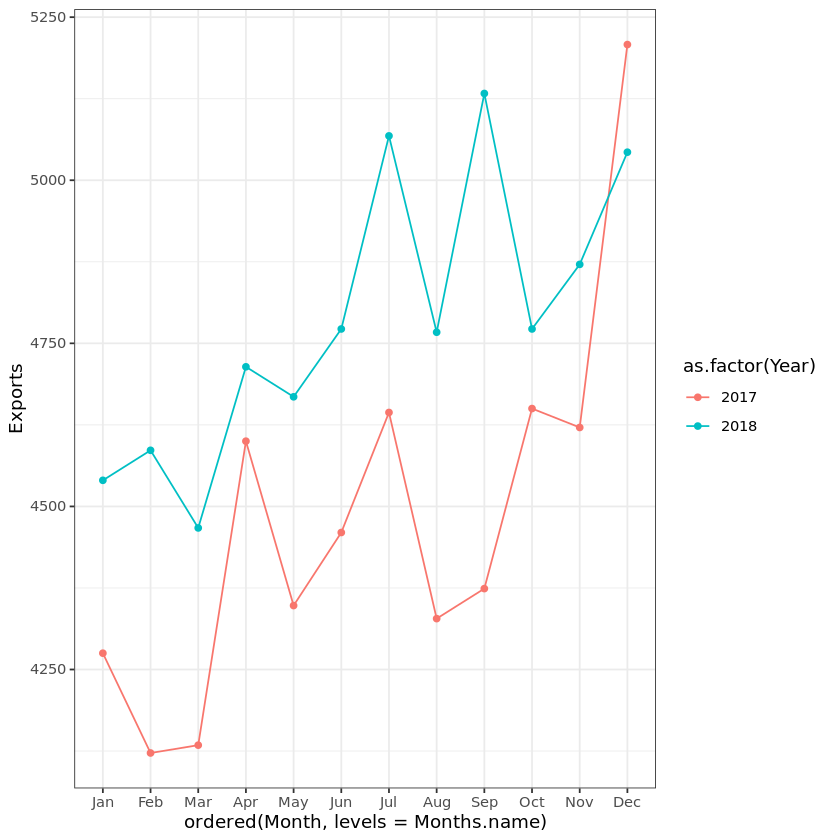

In [38]:
p <- ggplot(data = impexp, aes(x=ordered(Month,levels=Months.name), y = Exports)) + 
  geom_point(aes(color = as.factor(Year))) + geom_line(aes(group = as.factor(Year)
                                                           ,color = as.factor(Year)))+
  theme_bw()
p

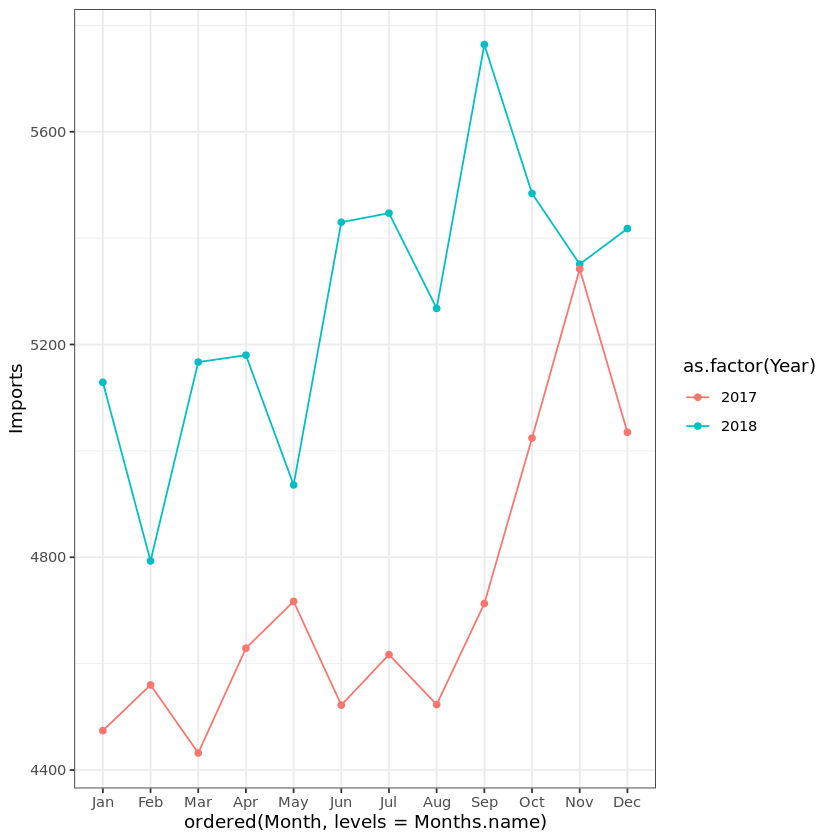

In [199]:
q <- ggplot(data = impexp, aes(x=ordered(Month,levels=Months.name), y = Imports)) + 
  geom_point(aes(color = as.factor(Year))) + geom_line(aes(group = as.factor(Year),color = as.factor(Year)))+
#geom_tile(aes(fill = "Min(°C)")) + 
  #scale_fill_gradient(low = "yellow", high = "red")+
  theme_bw()
q

In [72]:
a<-Export_Import_Temp_Monthly %>%head(12)
b<-inner_join(a,Export_Import_Data_2018,by=c("Month","Export_change_Value","Import_Change_Value","Year","Export_change_Value")) #%>% filter(Year.x=="2017")
head(b)

Month,Year,Export_change_Value,Import_Change_Value,Min(°C),Min(°F),Max(°F),measure,value,Exports,Imports
<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>
Jan,2018,-12.8,1.9,16,61,75,Exports,4540,4540,5129
Feb,2018,1.0,-6.6,17,63,75,Exports,4586,4586,4793
Mar,2018,-2.6,7.8,15,59,73,Exports,4467,4467,5167
Apr,2018,5.5,0.3,13,55,68,Exports,4714,4714,5180
May,2018,-1.0,-4.7,11,52,63,Exports,4668,4668,4936
Jun,2018,2.2,10.0,8,46,59,Exports,4772,4772,5430


In [188]:
c<-inner_join(a,Export_Import_Data_2017,by=c("Month","Export_change_Value","Import_Change_Value","Export_change_Value")) 
head(a)

Month,Year,Export_change_Value,Import_Change_Value,Min(°C),Min(°F),Max(°F),measure,value
<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<chr>,<dbl>
Jan,2018,-12.8,1.9,16,61,75,Exports,4540
Feb,2018,1.0,-6.6,17,63,75,Exports,4586
Mar,2018,-2.6,7.8,15,59,73,Exports,4467
Apr,2018,5.5,0.3,13,55,68,Exports,4714
May,2018,-1.0,-4.7,11,52,63,Exports,4668
Jun,2018,2.2,10.0,8,46,59,Exports,4772


In [194]:
head(impexp)

Year,Month,Exports,Export_change_Value,Imports,Import_Change_Value
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
2018,Jan,4540,-12.8,5129,1.9
2018,Feb,4586,1.0,4793,-6.6
2018,Mar,4467,-2.6,5167,7.8
2018,Apr,4714,5.5,5180,0.3
2018,May,4668,-1.0,4936,-4.7
2018,Jun,4772,2.2,5430,10.0


In [131]:
library(viridis)

Loading required package: viridisLite



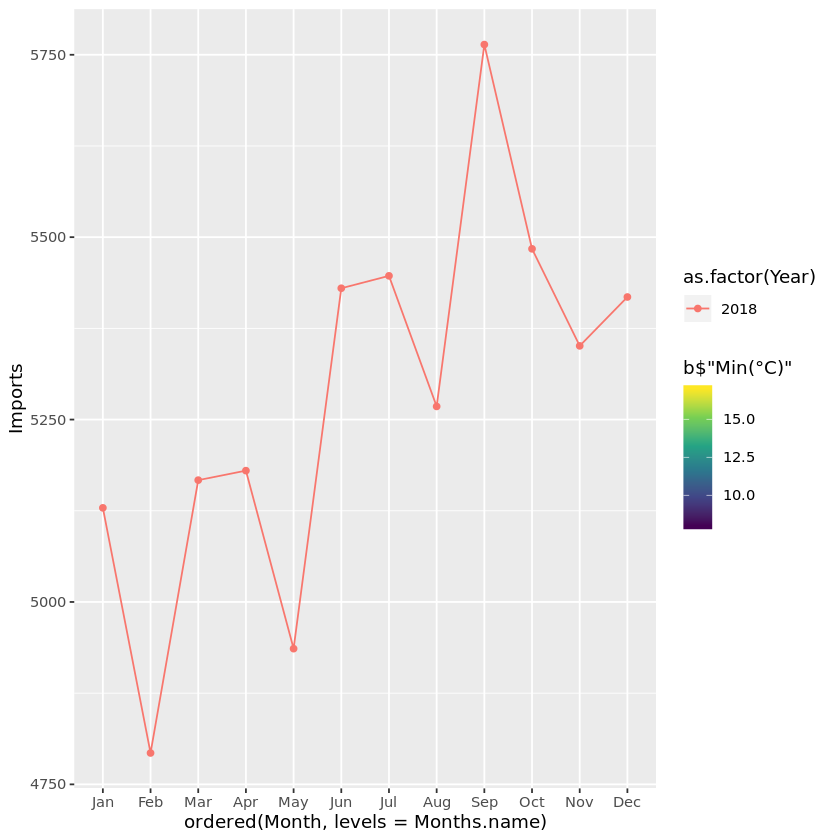

In [150]:
ggplot(data = b, aes(x=ordered(Month,levels=Months.name),y=Imports)) + 
  geom_point(aes(color = as.factor(Year),fill=b$"Min(°C)")) + geom_line(aes(group = as.factor(Year),color = as.factor(Year)))+

scale_fill_viridis_c()
 

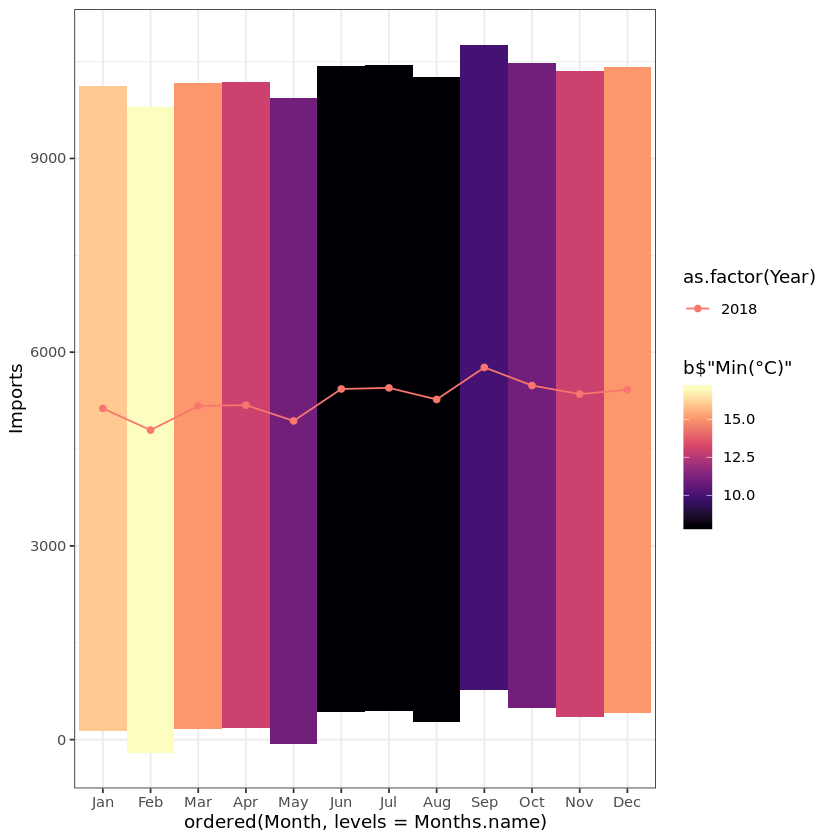

In [200]:
ggplot(data = b, aes(x=ordered(Month,levels=Months.name), y = Imports)) + 
 
  geom_tile(aes(fill = b$"Min(°C)",height=10000))+ geom_point(aes(color = as.factor(Year))) + 
geom_line(aes(group = as.factor(Year),color = as.factor(Year)))+scale_fill_viridis_c(option="A")+
#geom_tile(aes(fill = "Min(°C)")) + 
  theme_bw()